In [1]:
import ateam.sim.setup.batch_builder as bb
import ateam.sim.setup.default_props as defaults
import ateam.sim.setup as sim
import numpy as np
%matplotlib inline

# Don't use any lists!!
edge_props = {
    'nsyns': 50,
    'syn_weight': 1e-5, 
    'distance_range_min': 0,
    'distance_range_max': 200,
    'delay': 0,
    'target_sections': 'a',
    'dynamics_params': 'AMPA_ExcToExc.json',
    'model_template': 'exp2syn'
}

cell_id = 525133308
# node_props = defaults.cellprops_active(cell_id)
# The above probably won't work, may need to tweak the properties below,
# especially filenames
node_props = {
        'cell_name': cell_id,
        'morphology': '%s.swc' % cell_id,
        'dynamics_params': 'optim_param_%s.json' % cell_id,
        'model_type': 'biophysical',
        'model_template': 'ctdb:Biophys1.hoc',
        'model_processing': 'aibs_allactive'
    }

# Specify the sim folder and the template file (which will set the search path for param files)
folder = './batch_rates'
template = "/allen/aibs/mat/tmchartrand/bmtk_networks/biophys_components_shared/default_config.json"

sm = sim.SimManager.from_template(config_template=template, overwrite=True, sim_folder=folder)

distance_list = np.linspace(0, 350, 5)
interval = 10
linked_edge_props = {'distance_range_min':distance_list, 'distance_range_max':distance_list+interval}

input_props = {'input_rate': np.linspace(1, 4000, 10)}

net = bb.build_batch_all(sm, node_props, edge_props, input_props, n_duplicates=4)

In [ ]:
sm.run_bionet_mpi(ncores=4)

In [ ]:
import pandas as pd
import ateam.analysis.spikes as spikes
import matplotlib.pyplot as plt

nodes_df = bb.read_node_props_batch(sm.sim_folder)
nodes_df = nodes_df.join(pd.Series(spikes.get_rates_config(sm.config_path), name='out_rate'))
df_agg = nodes_df.groupby('input_rate').agg(['mean','std'])
df_agg['out_rate'].dropna().plot(y='mean', yerr='std')
plt.axis(xmin=0, ymin=0)
plt.show()

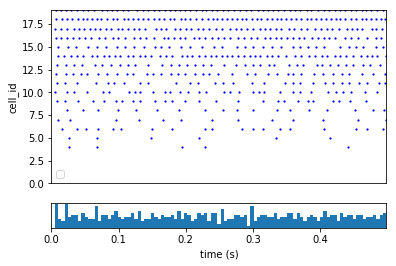

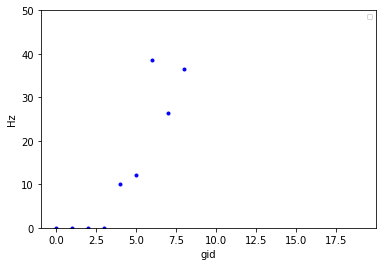

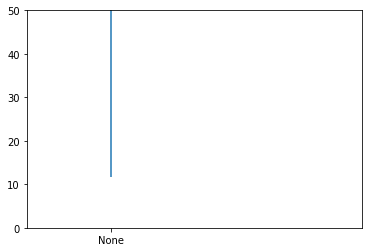

In [2]:
netname = 'batch'
sm.plot_raster(netname)
sm.plot_rates(netname)